In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import math as m

#Slopes of the line in K/m
a1 = -6.5*10**(-3) 
a2 = 3*10**(-3) 
a3 = -4.5*10**(-3) 
a4 = 4*10**(-3) 

#heights of 1976 in m
h0 = 0
h1 = 11e3
h2 = 25e3
h3 = 47e3
h4 = 53e3
h5 = 79e3
h6 = 90e3
h7 = 105e3

#temperatures in K
t0 = 288.16 
t1 = 216.66 #temp for the straight portion (t1i = t1f)
t2 = 282.66 #temp for the straight portion (t2i = t2f)
t3 = 165.66 #temp for the straight portion (t3i = t3f)
t4 = 225.66 

#Defining variables
g0 = 9.81 #m/s
R = 287 #j/(kg*k)
P1 = 1.01325e5
rho1 = 1.225 #kg/m^3

#Problem 1:


def Atmos1976(h):          #plug in h (atmosphere) to find temp
    if (h <= 11e3): #Sloped Regions
        T = a1*(h-h0)+t0
        P = P1*((T/t0)**(-g0/(a1*R)))
        Rho = rho1*((T/t0)**((-g0/(a1*R))-1))
        return T, P, Rho;

    elif (h > 11e3 and h <= 25e3): #Isothermal (straight) Regions
        T = 216.66
        P = 22615.568693731882 * m.e**((-g0/(R*T))*(h-h1))  #each number is the max of last code
        Rho = 0.3636486218188974 * P / (P1*((T/t0)**(-g0/(a1*R))))  
        return T, P, Rho;
    
    elif (h > 25e3 and h <= 47e3): #Sloped Regions
        T = a2*(h-h2)+t1
        P = 2484.173963954718 * ((T/t1)**((-g0/(a2*R)))) 
        Rho = 0.039944449356292225 * ((T/t1)**((-g0/(a2*R))-1))
        return T, P, Rho;

    elif (h > 47e3 and h <= 53e3): #Isothermal (straight) Regions 
        T = 282.66
        P = 120.05224490380778 * (m.e**((-g0/(R*T))*(h-h3)))
        Rho = 0.0014796503549390151 * P / (120.05224490380778*((T/t2)**(-g0/(a3*R))))
        return T, P, Rho; #off by 4 on P and .2e-3 on rho

    elif (h > 53e3 and h <= 79e3): #Sloped Regions
        T = a3*(h-h4)+t2
        P = 58.11163463722042 * ((T/t2)**((-g0/(a3*R))))
        Rho = 0.0007162290125098886 * ((T/t2)**((-g0/(a3*R))-1))
        return T, P, Rho;
    
    elif (h > 79e3 and h <= 90e3): #Isothermal (straight) Regions
        T = 165.66
        P = 1.0038721832475015 * (m.e**((-g0/(R*T))*(h-h5)))
        Rho = (2.1111249337419792e-05) * P / (1.0038721832475015*((T/t2)**(-g0/(a3*R))))
        return T, P, Rho;
    
    elif (h > 90e3 and h <= 105e3): #Sloped Regions
        T = a4*(h-h6)+t3
        P = 0.10374676811558331 * ((T/t3)**((-g0/(a4*R))))
        Rho = 0.00012629750262085955 * ((T/t3)**((-g0/(a4*R))-1))
        return T, P, Rho;

print(Atmos1976(10e3))

#interpolation eq
def interpol(x,x0,x1,y0,y1): 
    y = (x-x0)*(y1-y0)/(x1-x0) + y0 #interpolation equation
    return y
true = interpol(51.7e3, 51500,52000,9.0589e-4,8.5360e-4)
approx = Atmos1976(51.7e3)[2]

percentE = (abs(true-approx)/true)*100
print(percentE)

(223.16000000000003, 26418.974267735106, 0.41243239571702117)
5.2902647009894475


<function matplotlib.pyplot.show(*args, **kw)>

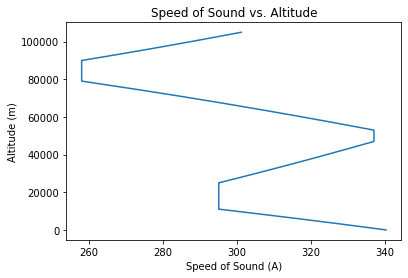

In [12]:
#Question 2a
h = np.linspace(0, h7, 1000)
gamma = 1.4 #given values
Speed_Sound = []

for altitude in h:
    temp = Atmos1976(altitude)[0] #call prior function
    A = m.sqrt(gamma*R*temp) 
    Speed_Sound.append(A)

plt.plot(Speed_Sound, h)
plt.ylabel('Altitude (m)')
plt.xlabel('Speed of Sound (A)')
plt.title("Speed of Sound vs. Altitude")
plt.show



In [14]:
#Question 3
import math as m
#vi = vf

# 1 #gal/min * (1/60) #min/sec *(1/7.48) #ft^3/gal 
f = 1 * (1/60) * (1/7.48)
r = (5/8) * (1/2) * (1/12) #in ft

vf = f / (m.pi * r**2)




<function matplotlib.pyplot.show(*args, **kw)>

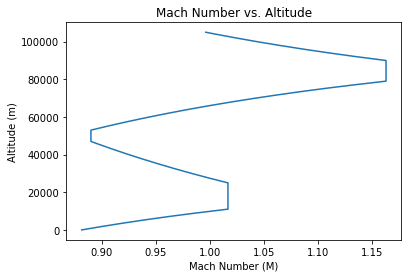

In [13]:
#Question 2b
Mach = []
v = 300 #m/s

for altitude in h:
    temp = Atmos1976(altitude)[0]
    A = m.sqrt(gamma*R*temp)
    M = v/A
    Mach.append(M)


plt.plot(Mach, h)
plt.ylabel('Altitude (m)')
plt.xlabel('Mach Number (M)')
plt.title("Mach Number vs. Altitude")
plt.show
